<a href="https://colab.research.google.com/github/EngrLawal/EngrLawal/blob/main/AppliedAI_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import *
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from math import floor
from sklearn.metrics import make_scorer, accuracy_score,confusion_matrix,ConfusionMatrixDisplay,roc_curve,roc_auc_score,plot_roc_curve,plot_confusion_matrix,plot_precision_recall_curve,precision_recall_fscore_support,classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import time
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.activations import softmax
import itertools
from keras.models import Sequential

import warnings
warnings.filterwarnings("ignore")
import time



In [ ]:
# Load dataset
titanic = pd.read_csv('/content/drive/MyDrive/csv_file/train.csv')

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [ ]:
print('titanic shape: ',titanic.shape)

titanic shape:  (891, 12)


#Cleaning

In [ ]:
mode = titanic['Embarked'].mode()
print(mode)
titanic['Age'] = titanic['Age'].replace(np.nan, titanic['Age'].mean())
titanic['Embarked'] = titanic['Embarked'].replace(np.nan, 'S')
titanic = titanic.drop(columns=['Name', 'Ticket', 'Cabin'])
titanic = titanic.dropna(axis=0)

0    S
dtype: object


#Encoding

In [ ]:
titanic['Sex'] = titanic['Sex'].astype('category').map({'male': 1, 'female':0})
titanic['Embarked'] = titanic['Embarked'].astype('category').map({'Q': 1, 'S':2, 'C':3})

In [ ]:
titanic.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,3


In [ ]:
X=titanic.iloc[:,2:9]
y=titanic['Survived']
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)

# Base Model

In [ ]:
def create_model(init_mode ='uniform',learn_rate=0.01):
    model = Sequential()
    model.add(Dense(units=8, activation = 'linear', input_dim = X_train.shape[1]))
    model.add(Dropout(0.2))
    model.add(Dense(units=8, activation ='linear'))
    model.add(Dense(units=1, activation ='sigmoid'))
    model.add(Dropout(0.2))
    model.compile(loss='binary_crossentropy', optimizer= 'SGD', metrics=['accuracy'])
    return model

# fix random seed for reproducibility
seed = 2
np.random.seed(seed)

model = create_model(init_mode ='uniform',learn_rate=0.01)

start=time.time()
history=model.fit(X_train,y_train, batch_size=10,epochs=5,verbose=True)
end=time.time()
Time =end-start
print('search and train time: ', Time)


Epoch 1/5
72/72 [==============================] - 1s 3ms/step - loss: 8.1188 - accuracy: 0.4579
Epoch 2/5
72/72 [==============================] - 0s 3ms/step - loss: 4.3882 - accuracy: 0.5913
Epoch 3/5
72/72 [==============================] - 0s 3ms/step - loss: 3.4433 - accuracy: 0.6320
Epoch 4/5
72/72 [==============================] - 0s 2ms/step - loss: 2.5103 - accuracy: 0.6489
Epoch 5/5
72/72 [==============================] - 0s 3ms/step - loss: 8.7347 - accuracy: 0.4129
search and train time:  1.9496781826019287


In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 5.94389533996582
Test accuracy: 0.44134077429771423


In [ ]:
plt.show()

#Optimized Model

#####One hidden layer

In [ ]:
def create_model(activation= 'linear', optimizer='SGD',Layer1=8, batch_size=10, epochs=5,dropout_rate=0.2,init_mode ='uniform',learn_rate=0.01):
    model = Sequential()
    model.add(Dense(Layer1, input_dim = X_train.shape[1], activation = activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation ='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer= optimizer, metrics=['accuracy'])
    return model

# Definying grid parameters
activation = ['softmax', 'relu', 'sigmoid']
Layer1 = [8, 16]
Layer2 = [8,16]
epochs = [5,10,20]
batch_size = [10,30]
learn_rate=[0.01,0.1]
dropout_rate=[0.2,0.3]
init_mode = ['uniform','normal']


optimizer = ['SGD', 'Adam', 'Adamax']
param_grid = dict(activation = activation, optimizer = optimizer, Layer1=Layer1,batch_size=batch_size, 
                  epochs=epochs,learn_rate=learn_rate,dropout_rate=dropout_rate,init_mode=init_mode)


# fix random seed for reproducibility
seed = 2
np.random.seed(seed)

clf = KerasClassifier(build_fn= create_model, verbose= 0)
start=time.time()
grid_search = GridSearchCV(estimator= clf, cv=3, param_grid=param_grid, n_jobs=-1)
history1=grid_search.fit(X_train,y_train)
end=time.time()
Time =end-start
print('search and train time: ', Time)




search and train time:  2625.80979013443


In [ ]:
print('Time for searching best hyperparameters as well as model training:', Time)
# summarize results
print("Best: %f using %s" % (history1.best_score_, history1.best_params_))
means = history1.cv_results_['mean_test_score']
stds = history1.cv_results_['std_test_score']
params = history1.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Time for searching best hyperparameters as well as model training: 2625.80979013443
Best: 0.733131 using {'Layer1': 16, 'activation': 'relu', 'batch_size': 10, 'dropout_rate': 0.3, 'epochs': 20, 'init_mode': 'uniform', 'learn_rate': 0.01, 'optimizer': 'Adam'}
0.630648 (0.022930) with: {'Layer1': 8, 'activation': 'softmax', 'batch_size': 10, 'dropout_rate': 0.2, 'epochs': 5, 'init_mode': 'uniform', 'learn_rate': 0.01, 'optimizer': 'SGD'}
0.630642 (0.022514) with: {'Layer1': 8, 'activation': 'softmax', 'batch_size': 10, 'dropout_rate': 0.2, 'epochs': 5, 'init_mode': 'uniform', 'learn_rate': 0.01, 'optimizer': 'Adam'}
0.576103 (0.132959) with: {'Layer1': 8, 'activation': 'softmax', 'batch_size': 10, 'dropout_rate': 0.2, 'epochs': 5, 'init_mode': 'uniform', 'learn_rate': 0.01, 'optimizer': 'Adamax'}
0.679804 (0.016643) with: {'Layer1': 8, 'activation': 'softmax', 'batch_size': 10, 'dropout_rate': 0.2, 'epochs': 5, 'init_mode': 'uniform', 'learn_rate': 0.1, 'optimizer': 'SGD'}
0.647526 (0.0

In [ ]:
y_pred = history1.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
acc7 = accuracy_score(y_test,y_pred)

[[92  8]
 [55 24]]
              precision    recall  f1-score   support

           0       0.63      0.92      0.74       100
           1       0.75      0.30      0.43        79

    accuracy                           0.65       179
   macro avg       0.69      0.61      0.59       179
weighted avg       0.68      0.65      0.61       179



score is: 0.6480446927374302
[[92  8]
 [55 24]]


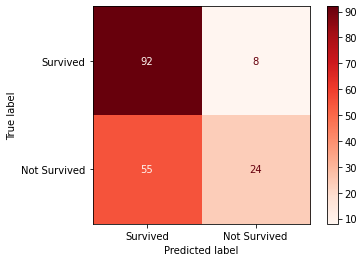

In [ ]:
y_predict= history1.predict(X_test)
score = accuracy_score(y_test,y_predict)
print('score is:',score)
print(confusion_matrix(y_test,y_predict))

labels = ["Survived", "Not Survived"]

cm = confusion_matrix(y_test, y_predict)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Reds)
plt.show()

#####Two hidden layer

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import time

def create_model(activation= 'linear', optimizer='SGD',Layer1=8, Layer2=8, batch_size=10, epochs=5,dropout_rate=0.2,init_mode ='uniform',learn_rate=learn_rate):
    model = Sequential()
    model.add(Dense(Layer1, input_dim = X_train.shape[1], activation = activation))
    model.add(Dense(Layer2, activation = activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation ='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer= optimizer, metrics=['accuracy'])
    return model

# Definying grid parameters
activation = ['softmax', 'relu', 'sigmoid']
Layer1 = [8, 16]
Layer2 = [8,16]
epochs = [5,10,20]
batch_size = [10,30]
learn_rate=[0.01,0.1]
dropout_rate=[0.2,0.3]
init_mode = ['uniform','normal']


optimizer = ['SGD', 'Adam', 'Adamax']
param_grid = dict(activation = activation, optimizer = optimizer, Layer1=Layer1, Layer2=Layer2,
                  batch_size=batch_size, epochs=epochs,learn_rate=learn_rate,dropout_rate=dropout_rate,
                  init_mode=init_mode)


# fix random seed for reproducibility
seed = 2
np.random.seed(seed)

clf = KerasClassifier(build_fn= create_model, verbose= 0)
start=time.time()
grid_search = GridSearchCV(estimator= clf, cv=3, param_grid=param_grid, n_jobs=-1)
history2=grid_search.fit(X_train,y_train)
end=time.time()
Time =end-start
print('search and train time: ', Time)







search and train time:  5690.05716919899


In [ ]:
print('Time for searching best hyperparameters as well as model training:', Time)
# summarize results
print("Best: %f using %s" % (history2.best_score_, history2.best_params_))
means = history2.cv_results_['mean_test_score']
stds = history2.cv_results_['std_test_score']
params = history2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Time for searching best hyperparameters as well as model training: 5690.05716919899
Best: 0.744424 using {'Layer1': 8, 'Layer2': 8, 'activation': 'relu', 'batch_size': 10, 'dropout_rate': 0.3, 'epochs': 20, 'init_mode': 'normal', 'learn_rate': 0.01, 'optimizer': 'Adam'}
0.630648 (0.022930) with: {'Layer1': 8, 'Layer2': 8, 'activation': 'softmax', 'batch_size': 10, 'dropout_rate': 0.2, 'epochs': 5, 'init_mode': 'uniform', 'learn_rate': 0.01, 'optimizer': 'SGD'}
0.630648 (0.022930) with: {'Layer1': 8, 'Layer2': 8, 'activation': 'softmax', 'batch_size': 10, 'dropout_rate': 0.2, 'epochs': 5, 'init_mode': 'uniform', 'learn_rate': 0.01, 'optimizer': 'Adam'}
0.630648 (0.022930) with: {'Layer1': 8, 'Layer2': 8, 'activation': 'softmax', 'batch_size': 10, 'dropout_rate': 0.2, 'epochs': 5, 'init_mode': 'uniform', 'learn_rate': 0.01, 'optimizer': 'Adamax'}
0.630648 (0.022930) with: {'Layer1': 8, 'Layer2': 8, 'activation': 'softmax', 'batch_size': 10, 'dropout_rate': 0.2, 'epochs': 5, 'init_mode': 

In [ ]:
y_pred = history2.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
acc7 = accuracy_score(y_test,y_pred)

[[89 11]
 [49 30]]
              precision    recall  f1-score   support

           0       0.64      0.89      0.75       100
           1       0.73      0.38      0.50        79

    accuracy                           0.66       179
   macro avg       0.69      0.63      0.62       179
weighted avg       0.68      0.66      0.64       179



score is: 0.664804469273743
[[89 11]
 [49 30]]


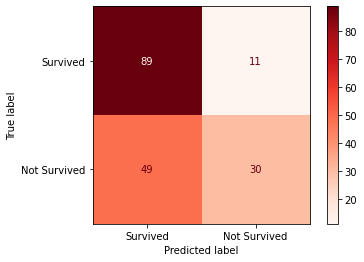

In [ ]:
y_predict= history2.predict(X_test)
score = accuracy_score(y_test,y_predict)
print('score is:',score)
print(confusion_matrix(y_test,y_predict))

labels = ["Survived", "Not Survived"]

cm = confusion_matrix(y_test, y_predict)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Reds)
plt.show()

# Random Forest - Grid Search

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(random_state=None)
base_model=rfc.fit(X_train, y_train)
y_pred = base_model.predict(X_test)

In [ ]:
#from sklearn.model_selection import cross_val_score

# To search the best parameters for optimization
rfc_params = {'max_features': range(1,3), 'min_samples_leaf': range(1,3), 'max_depth': range(3,10), 'criterion':['gini','entropy']}

rfc = RandomForestClassifier(random_state=2, n_jobs= -1)
start = time.time()
gs = GridSearchCV(rfc, rfc_params, n_jobs=-1, cv=3,verbose=True)

history3 = gs.fit(X_train, y_train)
end=time.time()
Time=end-start
print('Time to search and train: ',time)

Fitting 3 folds for each of 56 candidates, totalling 168 fits
Time to search and train:  <module 'time' (built-in)>


In [ ]:
# summarize results
print("Best: %f using %s" % (history3.best_score_, history3.best_params_))
means = history3.cv_results_['mean_test_score']
stds = history3.cv_results_['std_test_score']
params = history3.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.830059 using {'criterion': 'gini', 'max_depth': 9, 'max_features': 1, 'min_samples_leaf': 2}
0.809010 (0.027902) with: {'criterion': 'gini', 'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 1}
0.809004 (0.022008) with: {'criterion': 'gini', 'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 2}
0.796346 (0.008725) with: {'criterion': 'gini', 'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 1}
0.799158 (0.015514) with: {'criterion': 'gini', 'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 2}
0.806179 (0.017230) with: {'criterion': 'gini', 'max_depth': 4, 'max_features': 1, 'min_samples_leaf': 1}
0.811805 (0.014241) with: {'criterion': 'gini', 'max_depth': 4, 'max_features': 1, 'min_samples_leaf': 2}
0.810393 (0.006901) with: {'criterion': 'gini', 'max_depth': 4, 'max_features': 2, 'min_samples_leaf': 1}
0.818831 (0.005591) with: {'criterion': 'gini', 'max_depth': 4, 'max_features': 2, 'min_samples_leaf': 2}
0.811805 (0.007771) with: {'criterion': 'gini', 'ma

In [ ]:
y_pred = history3.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
acc7 = accuracy_score(y_test,y_pred)

[[91  9]
 [31 48]]
              precision    recall  f1-score   support

           0       0.75      0.91      0.82       100
           1       0.84      0.61      0.71        79

    accuracy                           0.78       179
   macro avg       0.79      0.76      0.76       179
weighted avg       0.79      0.78      0.77       179



score is: 0.776536312849162
[[91  9]
 [31 48]]


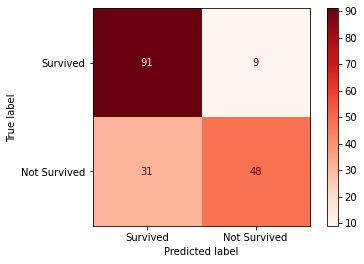

In [ ]:
y_predict= history3.predict(X_test)
score = accuracy_score(y_test,y_predict)
print('score is:',score)
print(confusion_matrix(y_test,y_predict))

labels = ["Survived", "Not Survived"]

cm = confusion_matrix(y_test, y_predict)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Reds)
plt.show()

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=2)
start = time.time()
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=3, verbose=True)
history4 = grid_search.fit(X_train, y_train)
end = time.time()
Time = end-start
print('Time to search and train: ',time)

Fitting 3 folds for each of 90 candidates, totalling 270 fits
Time to search and train:  <module 'time' (built-in)>


In [ ]:
# summarize results
print("Best: %f using %s" % (history4.best_score_, history4.best_params_))
means = history4.cv_results_['mean_test_score']
stds = history4.cv_results_['std_test_score']
params = history4.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.813140 using {'ccp_alpha': 0.01, 'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto'}
0.630618 (0.001742) with: {'ccp_alpha': 0.1, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto'}
0.630618 (0.001742) with: {'ccp_alpha': 0.1, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt'}
0.630618 (0.001742) with: {'ccp_alpha': 0.1, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2'}
0.630618 (0.001742) with: {'ccp_alpha': 0.1, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto'}
0.630618 (0.001742) with: {'ccp_alpha': 0.1, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt'}
0.630618 (0.001742) with: {'ccp_alpha': 0.1, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'log2'}
0.630618 (0.001742) with: {'ccp_alpha': 0.1, 'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto'}
0.630618 (0.001742) with: {'ccp_alpha': 0.1, 'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt'}
0.630618 (0.001742) with: {'ccp_alpha': 0.1, 'crit

In [ ]:
y_pred = history4.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
acc7 = accuracy_score(y_test,y_pred)

[[96  4]
 [45 34]]
              precision    recall  f1-score   support

           0       0.68      0.96      0.80       100
           1       0.89      0.43      0.58        79

    accuracy                           0.73       179
   macro avg       0.79      0.70      0.69       179
weighted avg       0.78      0.73      0.70       179



score is: 0.7262569832402235
[[96  4]
 [45 34]]


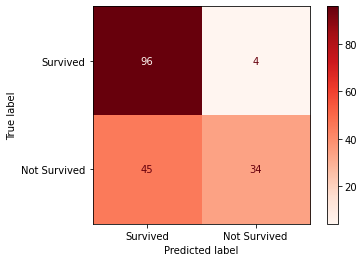

In [ ]:
y_predict= history4.predict(X_test)
score = accuracy_score(y_test,y_predict)
print('score is:',score)
print(confusion_matrix(y_test,y_predict))

labels = ["Survived", "Not Survived"]

cm = confusion_matrix(y_test, y_predict)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Reds)
plt.show()

#Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

params_nb = {'var_smoothing': np.logspace(0,-9, num=100)}
nb_start = time.time()
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=params_nb, verbose=1, cv=3, n_jobs=-1)
history5 = nbModel_grid.fit(X_train, y_train)
nb_end = time.time()
time = nb_end - nb_start()
print(nbModel_grid.best_estimator_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
GaussianNB(var_smoothing=5.336699231206313e-07)


In [ ]:
# summarize results
print("Best: %f using %s" % (history5.best_score_, history5.best_params_))
means = history5.cv_results_['mean_test_score']
stds = history5.cv_results_['std_test_score']
params = history5.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.799135 using {'var_smoothing': 5.336699231206313e-07}
0.660137 (0.017166) with: {'var_smoothing': 1.0}
0.661549 (0.018337) with: {'var_smoothing': 0.8111308307896871}
0.661549 (0.018337) with: {'var_smoothing': 0.657933224657568}
0.662955 (0.020052) with: {'var_smoothing': 0.533669923120631}
0.662955 (0.020052) with: {'var_smoothing': 0.43287612810830584}
0.665763 (0.020192) with: {'var_smoothing': 0.3511191734215131}
0.668564 (0.017178) with: {'var_smoothing': 0.2848035868435802}
0.668558 (0.013877) with: {'var_smoothing': 0.23101297000831597}
0.672771 (0.016607) with: {'var_smoothing': 0.1873817422860384}
0.679786 (0.018027) with: {'var_smoothing': 0.15199110829529336}
0.679780 (0.012283) with: {'var_smoothing': 0.12328467394420659}
0.676967 (0.015507) with: {'var_smoothing': 0.1}
0.678379 (0.019435) with: {'var_smoothing': 0.08111308307896872}
0.681186 (0.017545) with: {'var_smoothing': 0.0657933224657568}
0.682593 (0.016096) with: {'var_smoothing': 0.0533669923120631}
0.681

In [ ]:
y_pred = history5.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
acc7 = accuracy_score(y_test,y_pred)

[[86 14]
 [28 51]]
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       100
           1       0.78      0.65      0.71        79

    accuracy                           0.77       179
   macro avg       0.77      0.75      0.76       179
weighted avg       0.77      0.77      0.76       179



score is: 0.7653631284916201
[[86 14]
 [28 51]]


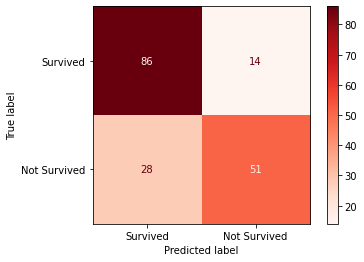

In [ ]:
y_predict= history5.predict(X_test)
score = accuracy_score(y_test,y_predict)
print('score is:',score)
print(confusion_matrix(y_test,y_predict))

labels = ["Survived", "Not Survived"]

cm = confusion_matrix(y_test, y_predict)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Reds)
plt.show()

#AUC ROC CURVE FOR COMPARISON

In [ ]:
# auc roc curve

# fit model
history1.fit(X_train, y_train)
history5.fit(X_train, y_train)
history3.fit(X_train, y_train)
history4.fit(X_train, y_train)
history5.fit(X_train, y_train)

# predict probabilities
pred_prob1 = history1.predict_proba(X_test)
pred_prob2 = history2.predict_proba(X_test)
pred_prob3 = history3.predict_proba(X_test)
pred_prob4 = history4.predict_proba(X_test)
pred_prob5 = history5.predict_proba(X_test)



from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])
auc_score5 = roc_auc_score(y_test, pred_prob5[:,1])

print(auc_score1, auc_score2, auc_score3, auc_score4)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 56 candidates, totalling 168 fits
Fitting 3 folds for each of 90 candidates, totalling 270 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
0.7743037974683544 0.7430379746835443 0.8615189873417721 0.7721518987341773


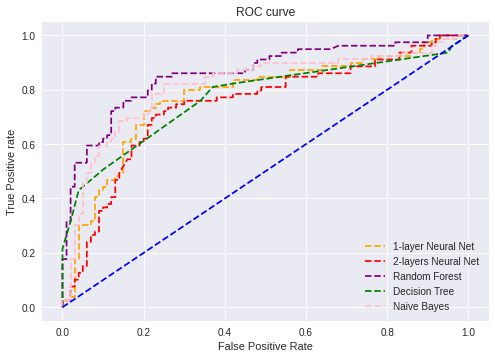

In [ ]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='1-layer Neural Net')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='2-layers Neural Net')
plt.plot(fpr3, tpr3, linestyle='--',color='purple', label='Random Forest')
plt.plot(fpr4, tpr4, linestyle='--',color='green', label='Decision Tree')
plt.plot(fpr5, tpr5, linestyle='--',color='pink', label='Naive Bayes')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();